# points

> generate random points

In [ ]:
#| hide
#| default_exp points

In [ ]:
#| hide
from nbdev.showdoc import *
import matplotlib.pyplot as plt

In [ ]:
#| export
import numpy as np
from fastcore.basics import patch

## helper functions

In [ ]:
#| export
rng = np.random.default_rng()

def h(x: np.array, al=1.2):
    """kernel function"""
    return np.exp(-al*x)

def update(f, t):
    def g(x:np.array):
        return f(x)+h(x-t)*(x>=t)
    return g

def find_next(f,points, t):
    ids = np.lexsort((points[:,0],))
    p_sort = points[ids]
    x, y = np.split(p_sort, 2, axis=1) # x is sorted
    fx = f(x)*(x>=t)
    idx = np.argmax(y<=fx) 
    # return idx where first true occurs, or if 0 retured, 
    # check whether it's because of all false, or truly 0
    # TODO: test the logic is correct
    return idx if x[idx]>=t and fx[idx]>0 else None



2


[<matplotlib.lines.Line2D>]

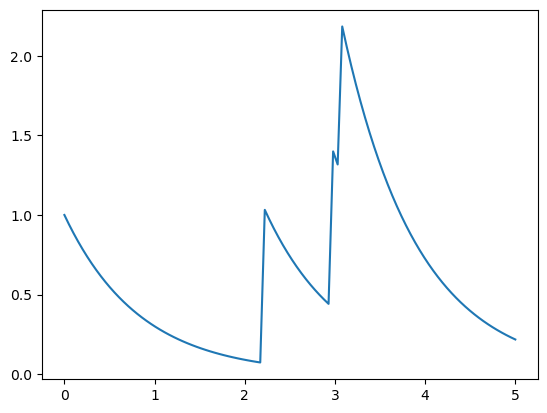

In [ ]:


print(find_next(h, rng.random((5,2)),0.5))

times = rng.random((3,))*5
f = h
for t in times:
    f = update(f,t)

x = np.linspace(0,5,100)
plt.plot(x, f(x))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()